<a href="https://colab.research.google.com/github/frfarhath/random_forest_regression/blob/main/RANDOM_FOREST_NEW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Install Required Libraries
!pip install pandas openpyxl scikit-learn

In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score

In [3]:
# Step 3: Load the Dataset
from google.colab import files

In [4]:
# Upload the file
uploaded = files.upload()

Saving JARTEST_last.csv to JARTEST_last.csv


In [8]:
# Replace 'JARTEST_last.csv' with your uploaded file name
file_name = "JARTEST_last.csv"
data = pd.read_csv(file_name)

In [9]:
# Display the first few rows of the dataset to confirm it's loaded correctly
print(data.head())

         Date  Raw_Turbidity  Raw_PH  Raw_Colour  PAC  KMnO4  ACD  Turbidity  \
0  31/12/2019           90.4    7.07       500.0  2.5    0.4  0.5       19.0   
1  31/12/2019           90.4    7.07       500.0  3.0    0.4  0.5       14.2   
2  31/12/2019           90.4    7.07       500.0  3.5    0.4  0.5       12.6   
3  31/12/2019           90.4    7.07       500.0  4.0    0.4  0.5       10.6   
4  31/12/2019           90.4    7.07       500.0  4.5    0.4  0.5       10.7   

     PH  Colour  
0  7.07    48.0  
1  7.05    39.0  
2  7.02    31.0  
3  6.98    27.0  
4  6.93    29.0  


In [10]:
data.isnull()

,Date,Raw_Turbidity,Raw_PH,Raw_Colour,PAC,KMnO4,ACD,Turbidity,PH,Colour
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
5101,False,False,False,False,False,False,False,False,False,False
5102,False,False,False,False,False,False,False,False,False,False
5103,False,False,False,False,False,False,False,False,False,False
5104,False,False,False,False,False,False,False,False,False,False


<Axes: >

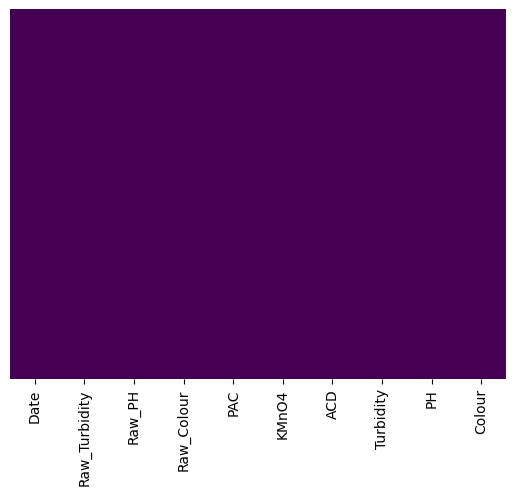

In [11]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5106 entries, 0 to 5105
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           5106 non-null   object 
 1   Raw_Turbidity  5106 non-null   float64
 2   Raw_PH         5106 non-null   float64
 3   Raw_Colour     5106 non-null   float64
 4   PAC            5106 non-null   float64
 5   KMnO4          5106 non-null   float64
 6   ACD            5106 non-null   float64
 7   Turbidity      5106 non-null   float64
 8   PH             5106 non-null   float64
 9   Colour         5106 non-null   float64
dtypes: float64(9), object(1)
memory usage: 399.0+ KB


In [13]:
# Drop the 'date' column
data = data.drop(columns=['date'], errors='ignore')

In [16]:
# Define features (X) and targets (y)
features = ['Raw_Turbidity', 'Raw_PH', 'Raw_Colour', 'PAC', 'KMnO4', 'ACD']
targets = ['Turbidity', 'PH', 'Colour']

X = data[features]
y = data[targets]

In [17]:
# Split the dataset: 80% training, 10% testing, 10% validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [46]:
# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}


grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=3,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_absolute_error')

In [60]:
# Retrieve the best parameters and the corresponding estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [61]:
# Predict on testing and validation sets
y_test_pred = best_model.predict(X_test)
y_val_pred = best_model.predict(X_val)

# Calculate metrics
from sklearn.metrics import mean_absolute_error, r2_score

test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print(f"Testing MAE: {test_mae:.2f}, R²: {test_r2:.2f}")
print(f"Validation MAE: {val_mae:.2f}, R²: {val_r2:.2f}")

Testing MAE: 6.09, R²: 0.72
Validation MAE: 5.76, R²: 0.74


In [49]:
# Train and evaluate with selected features
important_features = [features[i] for i in range(len(features)) if rf_model.feature_importances_[i] > 0.05]
X_train_selected = X_train[important_features]
X_test_selected = X_test[important_features]
X_val_selected = X_val[important_features]

rf_model.fit(X_train_selected, y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=300, random_state=42)

In [62]:
# Evaluate the model
# Define a function to calculate and display metrics for each target

def evaluate_model_per_target(y_true, y_pred, dataset_name):
    for i, target in enumerate(targets):
        mae = mean_absolute_error(y_true.iloc[:, i], y_pred[:, i])
        r2 = r2_score(y_true.iloc[:, i], y_pred[:, i])
        print(f"{dataset_name} - {target}: MAE = {mae:.2f}, R2 = {r2:.2f}")

In [63]:
# Predictions
y_train_pred = rf_model.predict(X_train_selected)
y_test_pred = rf_model.predict(X_test_selected)
y_val_pred = rf_model.predict(X_val_selected)

In [64]:
# Evaluate the model
def evaluate_model_per_target(y_true, y_pred, dataset_name):
    for i, target in enumerate(targets):
        mae = mean_absolute_error(y_true.iloc[:, i], y_pred[:, i])
        r2 = r2_score(y_true.iloc[:, i], y_pred[:, i])
        print(f"{dataset_name} - {target}: MAE = {mae:.2f}, R2 = {r2:.2f}")

evaluate_model_per_target(y_train, y_train_pred, "Training")
evaluate_model_per_target(y_test, y_test_pred, "Testing")
evaluate_model_per_target(y_val, y_val_pred, "Validation")

Training - Turbidity: MAE = 1.61, R2 = 0.95
Training - PH: MAE = 0.02, R2 = 0.98
Training - Colour: MAE = 4.86, R2 = 0.95
Testing - Turbidity: MAE = 4.11, R2 = 0.65
Testing - PH: MAE = 0.07, R2 = 0.85
Testing - Colour: MAE = 14.08, R2 = 0.66
Validation - Turbidity: MAE = 4.06, R2 = 0.67
Validation - PH: MAE = 0.06, R2 = 0.86
Validation - Colour: MAE = 13.16, R2 = 0.69


In [65]:
# Feature Importance
feature_importances = rf_model.feature_importances_
feature_importance_dict = {important_features[i]: feature_importances[i] for i in range(len(important_features))}
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

print("\nFeature Importances:")
for feature, importance in sorted_features:
    print(f"{feature}: {importance:.4f}")


Feature Importances:
Raw_Turbidity: 0.2370
PAC: 0.2270
Raw_PH: 0.2119
KMnO4: 0.1141
ACD: 0.1097
Raw_Colour: 0.1002


In [66]:
# Calculate R2 scores for all datasets in percentage
train_r2 = r2_score(y_train, y_train_pred) * 100
test_r2 = r2_score(y_test, y_test_pred) * 100
val_r2 = r2_score(y_val, y_val_pred) * 100

print(f"Training R²: {train_r2:.2f}%")
print(f"Testing R²: {test_r2:.2f}%")
print(f"Validation R²: {val_r2:.2f}%")

Training R²: 95.99%
Testing R²: 72.10%
Validation R²: 74.24%


In [67]:
# Function to evaluate each parameter (target) separately
def evaluate_model_per_target(y_true, y_pred, dataset_name):
    print(f"\n{dataset_name} Metrics Per Target:")
    for i, target in enumerate(targets):
        mae = mean_absolute_error(y_true.iloc[:, i], y_pred[:, i])
        r2 = r2_score(y_true.iloc[:, i], y_pred[:, i])
        print(f"{target}:")
        print(f"  Mean Absolute Error (MAE): {mae:.2f}")
        print(f"  R² Score: {r2:.2f}")

In [68]:
# Evaluate model on each dataset
evaluate_model_per_target(y_train, y_train_pred, "Training")
evaluate_model_per_target(y_test, y_test_pred, "Testing")
evaluate_model_per_target(y_val, y_val_pred, "Validation")


Training Metrics Per Target:
Turbidity:
  Mean Absolute Error (MAE): 1.61
  R² Score: 0.95
PH:
  Mean Absolute Error (MAE): 0.02
  R² Score: 0.98
Colour:
  Mean Absolute Error (MAE): 4.86
  R² Score: 0.95

Testing Metrics Per Target:
Turbidity:
  Mean Absolute Error (MAE): 4.11
  R² Score: 0.65
PH:
  Mean Absolute Error (MAE): 0.07
  R² Score: 0.85
Colour:
  Mean Absolute Error (MAE): 14.08
  R² Score: 0.66

Validation Metrics Per Target:
Turbidity:
  Mean Absolute Error (MAE): 4.06
  R² Score: 0.67
PH:
  Mean Absolute Error (MAE): 0.06
  R² Score: 0.86
Colour:
  Mean Absolute Error (MAE): 13.16
  R² Score: 0.69


In [69]:
def evaluate_model_per_target_percentage(y_true, y_pred, dataset_name):
    print(f"\n{dataset_name} Metrics Per Target (as Percentage):")
    for i, target in enumerate(targets):
        mae = mean_absolute_error(y_true.iloc[:, i], y_pred[:, i])
        r2 = r2_score(y_true.iloc[:, i], y_pred[:, i]) * 100
        value_range = y_true.iloc[:, i].max() - y_true.iloc[:, i].min()
        mae_accuracy = (1 - mae / value_range) * 100 if value_range != 0 else 0

        print(f"{target}:")
        print(f"  R² Accuracy: {r2:.2f}%")
        print(f"  Approximate Accuracy (based on MAE): {mae_accuracy:.2f}%")

# Evaluate model on each dataset
evaluate_model_per_target_percentage(y_train, y_train_pred, "Training")
evaluate_model_per_target_percentage(y_test, y_test_pred, "Testing")
evaluate_model_per_target_percentage(y_val, y_val_pred, "Validation")


Training Metrics Per Target (as Percentage):
Turbidity:
  R² Accuracy: 94.81%
  Approximate Accuracy (based on MAE): 98.68%
PH:
  R² Accuracy: 97.78%
  Approximate Accuracy (based on MAE): 99.17%
Colour:
  R² Accuracy: 95.39%
  Approximate Accuracy (based on MAE): 98.99%

Testing Metrics Per Target (as Percentage):
Turbidity:
  R² Accuracy: 65.20%
  Approximate Accuracy (based on MAE): 95.28%
PH:
  R² Accuracy: 84.86%
  Approximate Accuracy (based on MAE): 97.52%
Colour:
  R² Accuracy: 66.23%
  Approximate Accuracy (based on MAE): 96.42%

Validation Metrics Per Target (as Percentage):
Turbidity:
  R² Accuracy: 67.06%
  Approximate Accuracy (based on MAE): 95.01%
PH:
  R² Accuracy: 86.37%
  Approximate Accuracy (based on MAE): 96.90%
Colour:
  R² Accuracy: 69.29%
  Approximate Accuracy (based on MAE): 96.82%


In [70]:
def calculate_overall_accuracy(y_true, y_pred):
    # Calculate R² for each target
    r2_scores = [
        r2_score(y_true.iloc[:, i], y_pred[:, i])
        for i in range(len(targets))
    ]
    # Calculate overall accuracy as the mean R² score
    overall_r2 = sum(r2_scores) / len(r2_scores) * 100
    return overall_r2

# Overall accuracy for training, testing, and validation sets
overall_train_accuracy = calculate_overall_accuracy(y_train, y_train_pred)
overall_test_accuracy = calculate_overall_accuracy(y_test, y_test_pred)
overall_val_accuracy = calculate_overall_accuracy(y_val, y_val_pred)

print(f"Overall Training Accuracy: {overall_train_accuracy:.2f}%")
print(f"Overall Testing Accuracy: {overall_test_accuracy:.2f}%")
print(f"Overall Validation Accuracy: {overall_val_accuracy:.2f}%")

Overall Training Accuracy: 95.99%
Overall Testing Accuracy: 72.10%
Overall Validation Accuracy: 74.24%
